<a href="https://colab.research.google.com/github/TimurMMD/EDA_projects/blob/main/EDA_video_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis project of video games dataset
The dataset was taken from Kaggle, link:
https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset

The main questions that answered are:
1. What is distributions by year, by genre, by publisher?
2. What are the differences between US, Europe, Japan and the Rest of the World?


# 1. Uploading the dataset and initialising libraries.

In [21]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Uploading data as pandas DataFrame
data_ps4 = pd.read_csv('/content/PS4_GamesSales.csv', encoding='latin-1')
data_ps4.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


# 2. Data cleaning and checking for outliers

In [6]:
# Checking first the general data about the dataset
data_ps4.info()
# Seems to be some data missing in Year and Publisher Genre

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [9]:
# Checking some common statistics about numerical columns
data_ps4.describe()
# As we can see the numbers fo sales are left-skewed, but it is necessary to check on our charts
# The years are from 2013 to 2020. Also, Japan numbers are quite less than US, Europe or Rest of World, which is logical if to think.

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,2015.966061,0.204613,0.248714,0.033636,0.089014,0.576054
std,1.298360,0.563471,0.785491,0.108344,0.249410,1.583534
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,0.020000,0.000000,0.000000,0.010000,0.060000
75%,2017.000000,0.120000,0.130000,0.030000,0.050000,0.357500
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


In [11]:
# Check if there any missing values in columns
data_ps4.isna().sum()
# As we already know data is missing in Year and Publisher columns.
# 20 % could be important. We will try to build several charts with those data, and then without them and then compare.

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

In [14]:
# Let's count values of different columns
data_ps4.Genre.value_counts()

Genre
Action              258
Role-Playing        123
Misc                123
Adventure            97
Shooter              89
Sports               71
Racing               48
Platform             46
Action-Adventure     40
Fighting             35
Strategy             28
Simulation           23
Music                19
Puzzle               16
MMO                   8
Visual Novel          8
Party                 2
Name: count, dtype: int64

In [24]:
# Making a Series with Publisher with more than 10 games
publisher_count = data_ps4.Publisher.value_counts()
print(publisher_count[publisher_count >= 10])

Publisher
Namco Bandai Games                        56
Sony Interactive Entertainment            47
Ubisoft                                   45
Square Enix                               40
Tecmo Koei                                37
Activision                                30
Capcom                                    30
Warner Bros. Interactive Entertainment    27
Sony Computer Entertainment               25
Electronic Arts                           21
NIS America                               21
EA Sports                                 19
Deep Silver                               18
PQube                                     18
Bethesda Softworks                        17
505 Games                                 16
Sega                                      15
THQ Nordic                                15
Focus Home Interactive                    14
Maximum Games                             13
Konami Digital Entertainment              12
Unknown                                   12


In [25]:
data_ps4.Year.value_counts()

Year
2017.0    254
2016.0    222
2015.0    172
2014.0     98
2018.0     39
2013.0     20
2019.0     12
2020.0      8
Name: count, dtype: int64

In [33]:
data_top = data_ps4.nlargest(int(len(data_ps4) * 0.2), 'Global')
data_top

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
201,The Lego Ninjago Movie Videogame,2017.0,Action,Warner Bros. Interactive Entertainment,0.16,0.32,0.00,0.09,0.57
202,Resident Evil: Revelations 2,2015.0,Action,Capcom,0.14,0.25,0.11,0.07,0.57
203,Rock Band 4,2015.0,Music,Harmonix Music Systems,0.41,0.06,0.00,0.10,0.57
204,NHL 18,2017.0,Sports,EA Sports,0.31,0.16,0.00,0.10,0.57


# 3. Data Visualisation

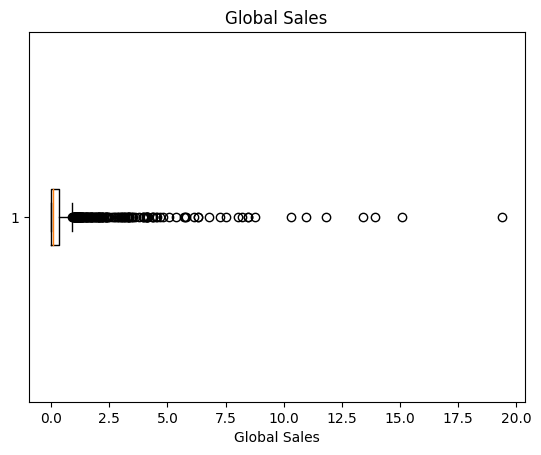

In [43]:
plt.boxplot(data_ps4["Global"], vert=False)
plt.xlabel("Global Sales")
plt.title("Global Sales")
plt.show()

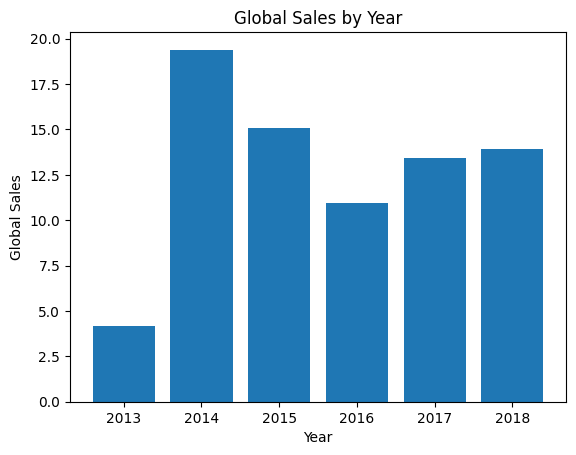

In [39]:
plt.bar("Year", "Global", data = data_top)
plt.title("Global Sales by Year")
plt.xlabel("Year")
plt.ylabel("Global Sales")
plt.show()